<div dir=rtl align=center>

<img src='https://upload.wikimedia.org/wikipedia/fa/thumb/a/a9/Sharif_logo.svg/626px-Sharif_logo.svg.png?20110526112825' alt="SUT logo" width=200 height=200 align=center  >
<br>
<font face="B Yekan">
<font color=0F5298 size=7>
یادگیری ماشین<br>
<font color=2565AE size=5>
دانشکده مهندسی صنایع<br>
<font color=2565AE size=4>
دکتر مهدی شریف زاده <br>
<font  size=4>

سعید زواشکیانی
 <br>
بهار 1402<br>

<font color=3C99D size=5>
تمرین عملی 1
<br>
سوال 4
مصالحه بایاس-واریانس 
<br>
80 نمره
    
    
____


### Full Name : Parsa Bakhtiari

### Student Number : 97104118

---


<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
در این تمرین با مصالحه بایاس-واریانس (bias-variance tradeoff) آشنا خواهید شد.

</div>

# Libraries

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['cyan','orange'])
cmap_bold = ListedColormap(['red', 'blue'])
import numpy as np
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from matplotlib.ticker import ScalarFormatter
# add what you want

# A. Make data (5 points)

<div dir="rtl" style="font-size:16px;"><font face="B Yekan">

ابتدا یک دیتاست مصنوعی با استفاده از 
[دستور make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html)
 با پارامتر noise=0.35 و با ۱۵۰۰ داده تصادفی بسازید.
</div>

In [70]:
X, y = make_moons(n_samples=1500, noise=0.35)
df_base = pd.DataFrame(
    {'Column 1': X[:, 0], 'Column 2': X[:, 1], 'Column 3': y})
df_base

,Column 1,Column 2,Column 3
0,-0.551798,0.971567,0
1,0.178177,0.612372,0
2,1.697438,-0.117136,1
3,-0.542034,0.622487,0
4,-1.068048,0.389433,0
...,...,...,...
1495,0.138043,0.842613,1
1496,0.582089,-0.189336,1
1497,-1.234534,0.066681,0
1498,0.798256,-0.472220,1


# B. Scatter Plot (5 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">

نمودار پراکندگی هر کلاس را با رنگ متفاوت در یک نمودار رسم کنید.
</div>

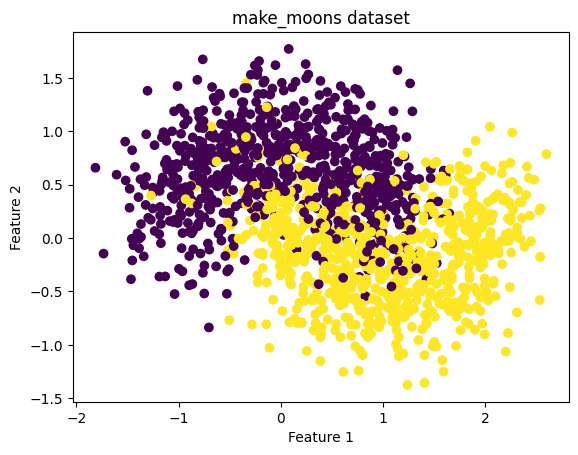

In [71]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('make_moons dataset')
plt.show()


# C. Decision boundaries (50 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">

حال دیتاست خود را به ۳ بخش مساوی به صورت تصادفی تقسیم کنید. برای هر بخش ۳
[مدل طبقه بند نزدیک‌ترین همسایه (‌k-nearest neighbor)](https://fa.wikipedia.org/wiki/%D8%A7%D9%84%DA%AF%D9%88%D8%B1%DB%8C%D8%AA%D9%85_%DA%A9%DB%8C-%D9%86%D8%B2%D8%AF%DB%8C%DA%A9%E2%80%8C%D8%AA%D8%B1%DB%8C%D9%86_%D9%87%D9%85%D8%B3%D8%A7%DB%8C%D9%87)
 با پارامتر k={1, 25, 50} آموزش دهید (در مجموع ۹ ترکیب خواهید داشت)(برای به کارگیری مدل می توانید از کتابخانه استفاده کنید.). برای هر ترکیب،‌ مرز تصمیم‌گیری را به همراه تمام دیتاست رسم کنید و نتیجه را در یک نمودار سه در سه که ردیف‌های آن، دیتاست‌های 
 متفاوت و ستون‌های آن k های متفاوت اند،‌ نشان دهید.‌ (‌برای اینکار باید صفحه را مش‌بندی کنید و کلاس هر نقطه در مش را با طبقه بند خود پیش‌بینی کنید).
</div>

In [96]:
df = df_base
df_1 = df.sample(n=500)
df = df.drop(df_1.index)
df_2 = df.sample(n=500)
df = df.drop(df_2.index)
df_3 = df


C:\Users\parsa\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\parsa\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\parsa\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\parsa\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\parsa\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with featur

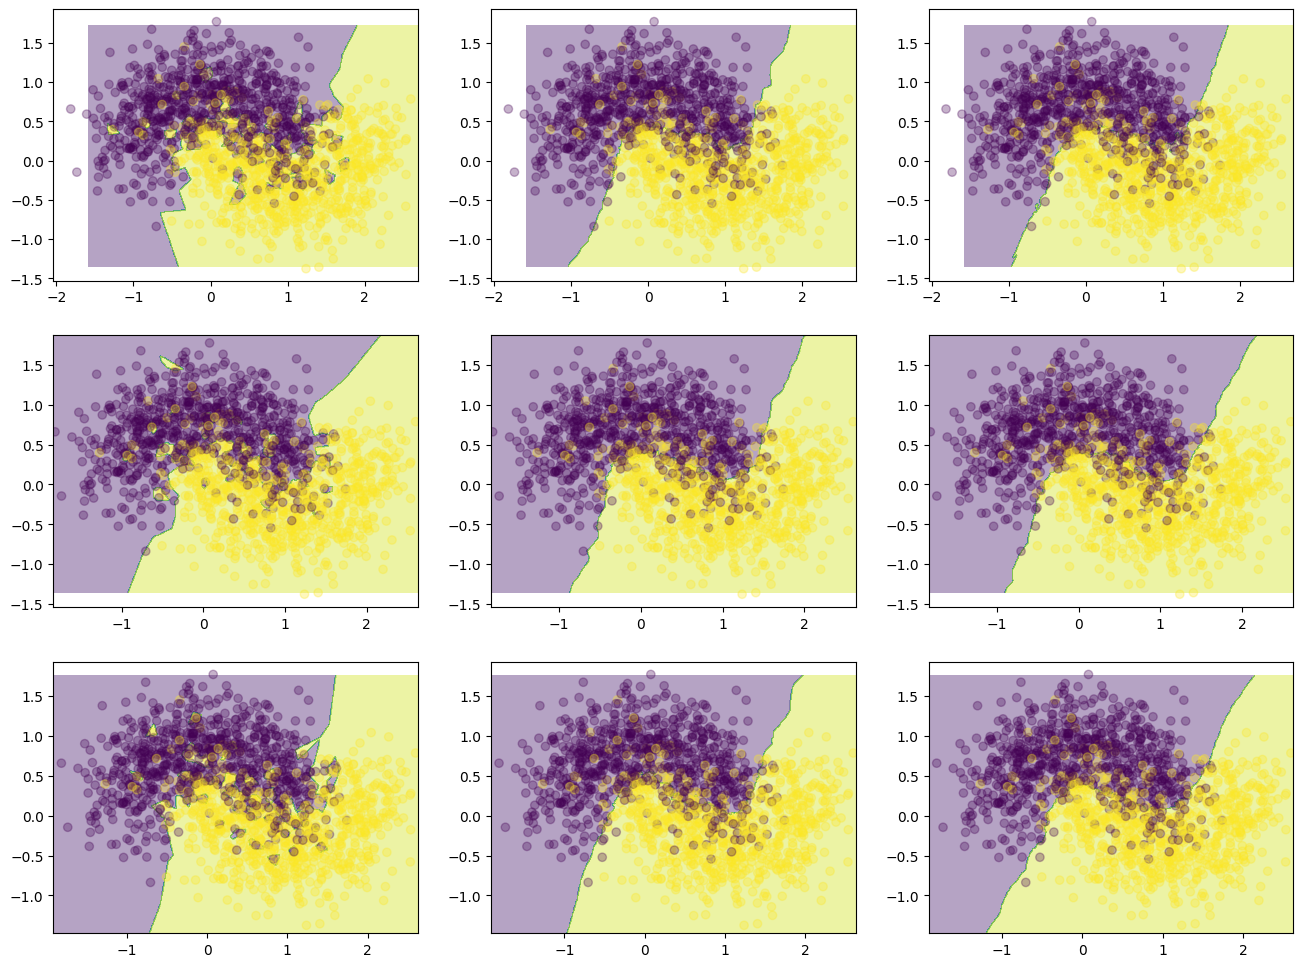

In [137]:
k_param = [1, 25, 50]
dfs = [df_1, df_2, df_3]
fig, axs = plt.subplots(3, 3)
fig.set_size_inches(16,12)


def plot_decision_boundary(clf, X, y, plt_x, plt_y, ax):
    x_min, x_max = X.iloc[:, 0].min() - 0.1, X.iloc[:, 0].max() + 0.1
    y_min, y_max = X.iloc[:, 1].min() - 0.1, X.iloc[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axs[plt_x, plt_y].contourf(xx, yy, Z, alpha=0.4)
    axs[plt_x, plt_y].scatter(df_base.iloc[:, 0], df_base.iloc[:, 1], c=df_base['Column 3'].values, alpha=0.3)


x_axis = 0

for df_n in dfs:
    y_axis = 0
    for k in k_param:
        # train_set, test_set = train_test_split(df_n, test_size=0.3, random_state=42)
        # knn = KNeighborsClassifier(n_neighbors=k)
        # knn.fit(train_set.iloc[:,:2], train_set.iloc['Column 3'])
        # y_predict = knn.predict(test_set.iloc[:,:2])
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(df_n.iloc[:, :2], df_n['Column 3'])
        plot_decision_boundary(
            knn, df_n.iloc[:, :2], df_n['Column 2'], x_axis, y_axis, axs)
        y_axis += 1
    x_axis += 1


# D. Bias Variance Trade-off (20 points)

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">
 تفاوت مرز تصمیم‌گیری در ردیف‌ها و ستون‌ها را بیان کنید و مصالحه بین بایاس-واریانس را بر اساس نمودار توضیح دهید.
</div>

<div dir="rtl" style="font-size:16px;">
<font face="B Yekan">

- مشاهده می‌شود که با زیاد شدن k مدل پیچیده‌تر شده و الگوهای پیچیده تری را ثبت میکند.

- در k=1 مشاهده میشود که مدل به خوبی نمیتواند داده ها را دسته بندی کند و به عبارتی underfitting است.

- با زیاد شدن k واریانس کاهش می یابد و همینطور کمتر نسبت به تک تک داده ها حساسیت دارد.

- بایاس با زیاد شدن k افزایش می یابد.
</div>